<div align="center">
  <a href="https://colab.research.google.com/github/biplab37/Graphene/blob/main/solveode.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width='200'/>
  </a>
</div>

### Import the packages

In [ ]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import solve_ivp

# For plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = False

#### Function definitions

In [ ]:
def exact_sol(E,A,t1,t2):
    
    ## define the system of ODEs
    def odes(t, x, p):
        E_field = E(t)
        vec_pot = A(t)

        def eps(p):
            return np.sqrt((p[0] - vec_pot[0])**2 + (p[1] - vec_pot[1])**2)
        
        def lamb(p):
            return (E_field[0]*(p[1] - vec_pot[1])- E_field[1]*(p[0] - vec_pot[0]))/eps(p)**2
        
        dx = np.zeros(3)
        dx[0] = 0.5*lamb(p)*x[1]
        dx[1] = lamb(p)*(1.0 - 2.0*x[0]) - 2.0*eps(p)*x[2]
        dx[2] = 2.0*eps(p)*x[1]

        return dx

    # Define the function which calculates the value of the function at a given momentum 
    # and return only the value at time t2.
    def fatp(p1, p2):
        t_span = (t1,t2)
        sol = solve_ivp(lambda t, x: odes(t, x, [p1, p2]), t_span, x0,max_step=1000)
        return sol.y[0][-1]

    return fatp

In [73]:
def generate_data(f,pxrange,pyrange):
    X, Y = np.meshgrid(pxrange, pyrange)

    # Evaluate the function at each point
    fp = np.vectorize(f)
    Z = fp(X, Y)
    return X,Y,Z

def plot_data(X,Y,Z):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122)

    sp1 = ax1.plot_surface(X, Y, Z,cmap=cm.coolwarm)
    sp2 = ax2.contourf(X,Y,Z,color=cm.coolwarm)
    fig.colorbar(sp1)
    fig.colorbar(sp2)

    # Add labels and title
    ax1.set_xlabel(r'kx')
    ax1.set_ylabel(r'ky')
    ax1.set_zlabel('f(kx,ky)')
    ax1.set_title('Surface Plot of f(kx,ky)')

    ax2.set_xlabel('kx')
    ax2.set_ylabel('ky')
    ax2.set_title('Contour Plot of f(kx,ky)')

#### Define Variables and Initial Conditions

In [ ]:
t1 = 0.0
t2 = 2*2*np.pi

## initial conditions
x0 = np.array([0.0, 0.0, 0.0])

Modify the values of external electric field $E(t)$ and vector potential $A(t)$ and rerun the cells below to see the difference in results.
>Note that the code might fail for highly oscillatory fields and it might take some time to run.

In [ ]:
# define external fields
omega = 1.0
def E(t):
    return np.array([0.02*np.sin(omega*t), 0.0])
def A(t):
    return np.array([0.02*(1.0 - np.cos(omega*t))/omega, 0.0])

<ipython-input-64-d727bfa53ad3>:15: UserWarning: The following kwargs were not used by contour: 'color'
  sp2 = ax2.contourf(X,Y,Z,color=cm.coolwarm)


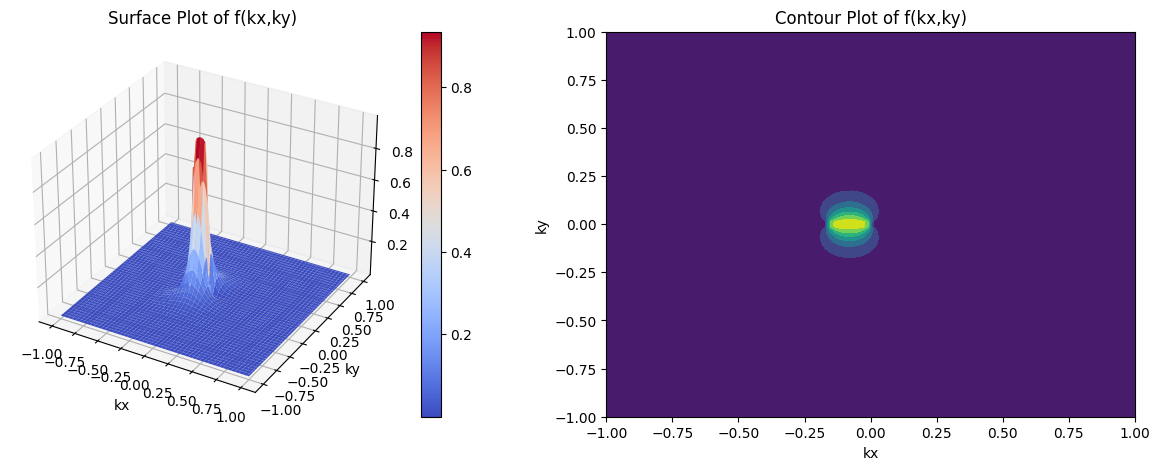

In [66]:
f = exact_sol(E,A,t1,t2)

range = np.linspace(-1,1,100)
plot_data(*generate_data(f,range,range))

## Approximate method

- Low density approximation $f \ll 1$
- Effective mass - $\langle P(t)^2\rangle \to m_*^2v_F^2$

In [163]:
def approximate_sol(E,A,t1,t2):
    msq = integrate.quad(lambda t: A(t)[0]**2,t1,t2)[0]/(t2-t1)
    def eps(p):
        return np.sqrt(msq + p[0]**2 + p[1]**2)
    def J(p,t):
        return integrate.quad(lambda x: E(x)[0]*np.cos(2*eps(p)*(x)),t1,t)[0]
    def f(px,py):
        return px**2 * J([px,py],t2)**2/(4*eps([px,py])**4)
    return f

In [166]:
def A(t):
    return [-0.1*np.tanh(5*t)/5,0.0]
def E(t):
    return [0.1/np.cosh(5*t)**2,0.0]

t1 = -5.0
t2 = 5.0

<ipython-input-73-ee27a42ab5ac>:15: UserWarning: The following kwargs were not used by contour: 'color'
  sp2 = ax2.contourf(X,Y,Z,color=cm.coolwarm)


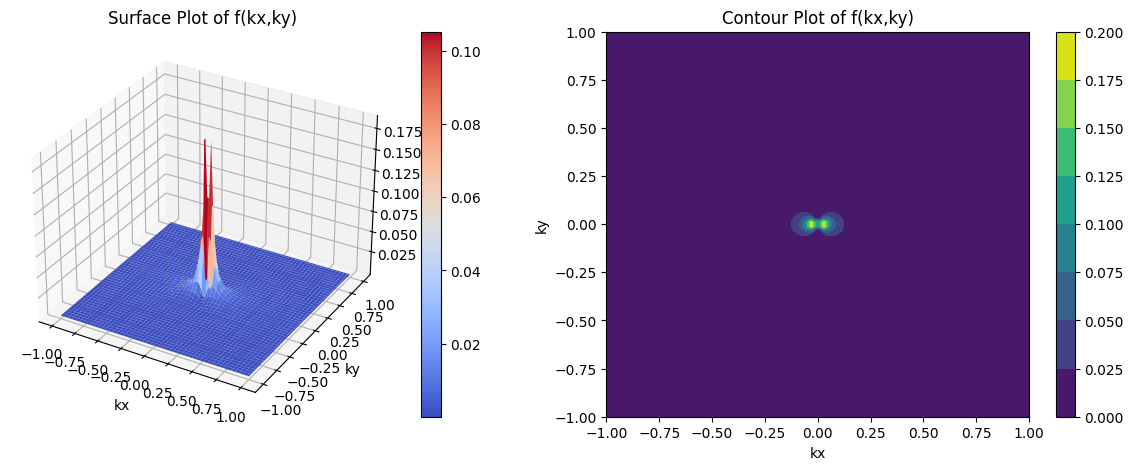

In [167]:
f1 = exact_sol(E,A,t1,t2)
X1,Y1,Z1 = generate_data(f1,range,range)
plot_data(X1,Y1,Z1)

f2 = approximate_sol(E,A,t1,t2)
X2,Y2,Z2 = generate_data(f2,range,range)
plot_data(X2,Y2,Z2)